# 1. Importações
---

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
URL = 'https://www.kaggle.com/datasets/mohithsairamreddy/salary-data'

In [ ]:
df = pd.read_csv('Salary_Data.csv')

# 2. Análise Exploratória dos Dados
---

In [ ]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [ ]:
df.isna().any()

Age                    True
Gender                 True
Education Level        True
Job Title              True
Years of Experience    True
Salary                 True
dtype: bool

In [ ]:
df.isna().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [ ]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


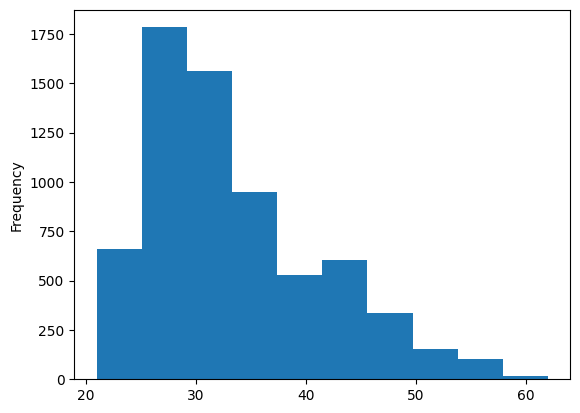

In [ ]:
df['Age'].plot(kind='hist')
plt.show()

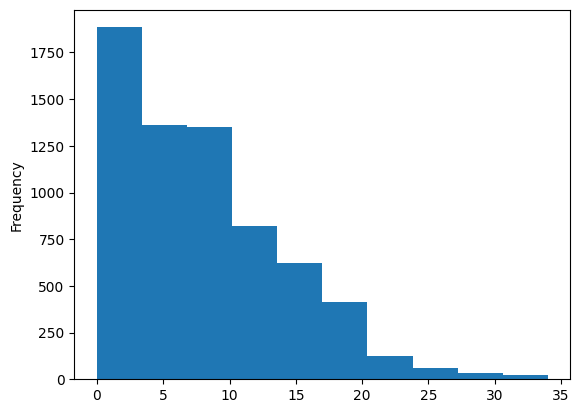

In [ ]:
df['Years of Experience'].plot(kind='hist')
plt.show()

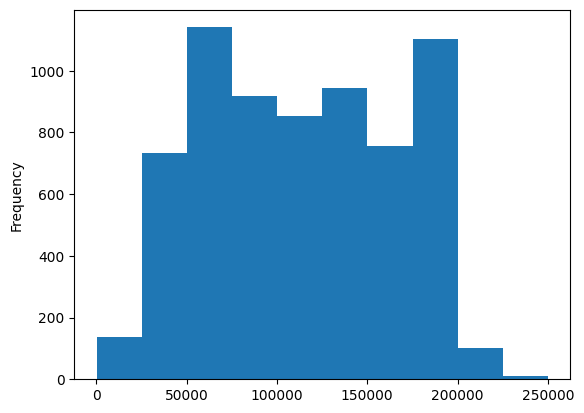

In [ ]:
df['Salary'].plot(kind='hist')
plt.show()

In [ ]:
df['Gender'].value_counts()

Male      3674
Female    3014
Other       14
Name: Gender, dtype: int64

In [ ]:
df['Job Title'].value_counts()

Software Engineer             518
Data Scientist                453
Software Engineer Manager     376
Data Analyst                  363
Senior Project Engineer       318
                             ... 
Account Manager                 1
Help Desk Analyst               1
Senior Training Specialist      1
Junior Web Designer             1
Supply Chain Analyst            1
Name: Job Title, Length: 193, dtype: int64

In [ ]:
df['Education Level'].value_counts()

Bachelor's Degree    2267
Master's Degree      1573
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: Education Level, dtype: int64

In [ ]:
df['Education Level'] = df['Education Level'].replace('phD','PhD')
df['Education Level'] = df['Education Level'].replace("Master's","Master's Degree")
df['Education Level'] = df['Education Level'].replace("Bachelor's","Bachelor's Degree")

# 2. Visualizações
---

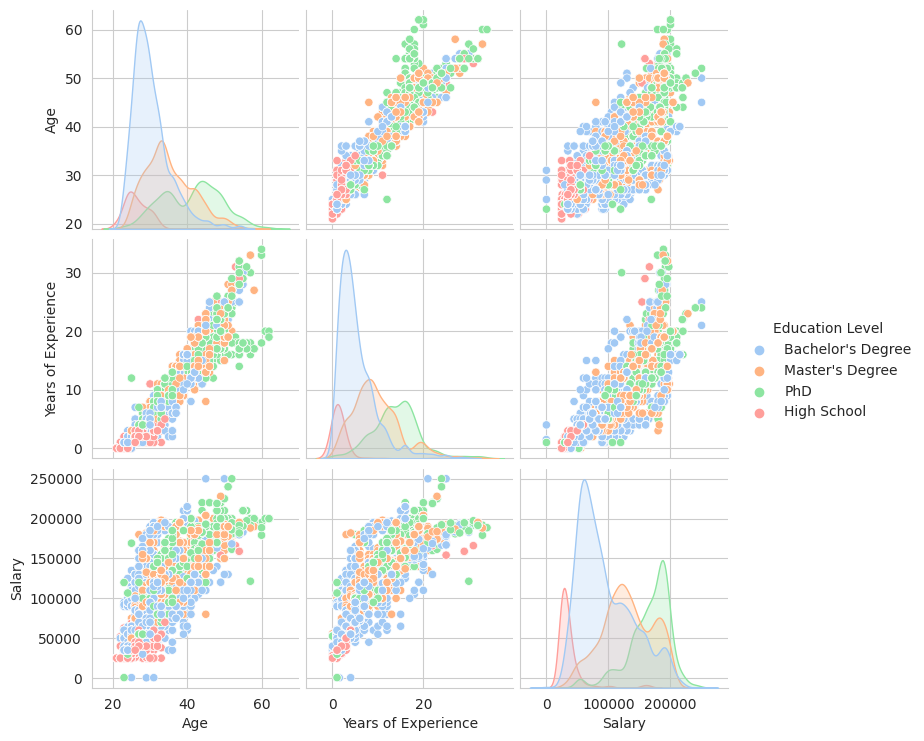

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=df, hue = 'Education Level', palette="pastel")

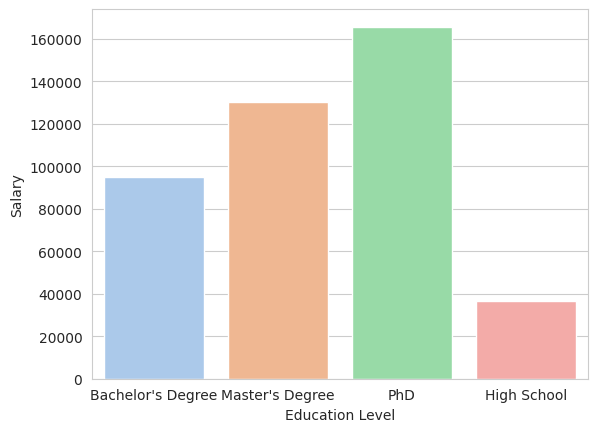

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.barplot(data=df, x ='Education Level', y ='Salary', palette="pastel", errorbar = None)

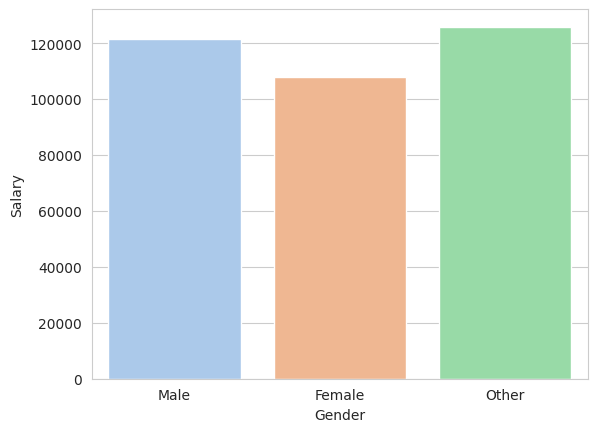

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.barplot(data=df, x ='Gender', y ='Salary', palette="pastel", errorbar = None)

In [ ]:
fig = px.histogram(
    df.groupby(['Job Title']).mean().reset_index().sort_values('Salary',ascending=False),
    x='Job Title',
    y='Salary',
    title='Salário por cargo',
)

fig.show()

<ipython-input-19-560d94124184>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Job Title']).mean().reset_index().sort_values('Salary',ascending=False),


In [ ]:
fig = px.histogram(
    df.groupby(['Years of Experience']).mean().reset_index().sort_values('Years of Experience',ascending=False),
    x='Years of Experience',
    y='Salary',
    title='Salário por educação',
)

fig.show()

<ipython-input-20-ec008d246b7f>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



# 3. Modelagem

In [ ]:
data = df[['Age','Gender','Education Level','Years of Experience','Salary']]
data = data.dropna()
data

,Age,Gender,Education Level,Years of Experience,Salary
0,32.0,Male,Bachelor's Degree,5.0,90000.0
1,28.0,Female,Master's Degree,3.0,65000.0
2,45.0,Male,PhD,15.0,150000.0
3,36.0,Female,Bachelor's Degree,7.0,60000.0
4,52.0,Male,Master's Degree,20.0,200000.0
...,...,...,...,...,...
6699,49.0,Female,PhD,20.0,200000.0
6700,32.0,Male,High School,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,4.0,55000.0
6702,46.0,Male,Master's Degree,14.0,140000.0


## Variáveis numéricas

In [ ]:
media_age = data['Age'].mean()
desvio_padrao_age = data['Age'].std()
data['age_std'] = data['Age'].apply(lambda nota: (nota - media_age) / desvio_padrao_age)

media_years = data['Years of Experience'].mean()
desvio_padrao_years = data['Years of Experience'].std()
data['years_std'] = data['Years of Experience'].apply(lambda nota: (nota - media_years) / desvio_padrao_years)

## Variáveis categóricas

In [ ]:
data['Gender'].drop_duplicates()

0         Male
1       Female
2378     Other
Name: Gender, dtype: object

In [ ]:
data['gender_m_nom'] = data['Gender'].apply(lambda sex: 1 if sex == 'Male' else 0)
data['gender_f_nom'] = data['Gender'].apply(lambda sex: 1 if sex == 'Female' else 0)
data['gender_o_nom'] = data['Gender'].apply(lambda sex: 1 if sex == 'Other' else 0)

In [ ]:
data['Education Level'].drop_duplicates()

0       Bachelor's Degree
1         Master's Degree
2                     PhD
2378          High School
Name: Education Level, dtype: object

In [ ]:
education_mapper = {
    "PhD": 4,
    "Master's Degree": 3,
    "Bachelor's Degree": 2,
    "High School": 1
}

data['education_encoded'] = data['Education Level'].apply(lambda level: education_mapper[level])

,Age,Gender,Education Level,Years of Experience,Salary,age_std,years_std,gender_m_nom,gender_f_nom,gender_o_nom,education_encoded
0,32.0,Male,Bachelor's Degree,5.0,90000.0,-0.213113,-0.510731,1,0,0,2
1,28.0,Female,Master's Degree,3.0,65000.0,-0.738338,-0.840748,0,1,0,3
2,45.0,Male,PhD,15.0,150000.0,1.493868,1.139355,1,0,0,4
3,36.0,Female,Bachelor's Degree,7.0,60000.0,0.312112,-0.180714,0,1,0,2
4,52.0,Male,Master's Degree,20.0,200000.0,2.413012,1.964398,1,0,0,3


In [ ]:
data = data.drop(['Age','Gender','Education Level','Years of Experience'],axis=1)

In [ ]:
data.head()

,Salary,age_std,years_std,gender_m_nom,gender_f_nom,gender_o_nom,education_encoded
0,90000.0,-0.213113,-0.510731,1,0,0,2
1,65000.0,-0.738338,-0.840748,0,1,0,3
2,150000.0,1.493868,1.139355,1,0,0,4
3,60000.0,0.312112,-0.180714,0,1,0,2
4,200000.0,2.413012,1.964398,1,0,0,3


## Treino/Teste

In [ ]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    data.drop(['Salary'], axis=1),
    data['Salary'],
    test_size=0.33,
    random_state=123
)

## Treino

In [ ]:
model = LinearRegression()

In [ ]:
model = model.fit(predictors_train, target_train)

In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['age_std', 'years_std', 'gender_m_nom', 'gender_f_nom',
        'gender_o_nom', 'education_encoded'], dtype=object),
 'n_features_in_': 6,
 'coef_': array([-15108.08210521,  48389.07698117,  14114.77028461,   7850.62452614,
        -21965.39481075,  15340.95612095]),
 'rank_': 5,
 'singular_': array([1.02610365e+02, 4.75510135e+01, 4.23898132e+01, 1.67601999e+01,
        3.19630510e+00, 1.95414067e-15]),
 'intercept_': 63720.2066863138}

In [ ]:
a = model.coef_
print(a)

[-15108.08210521  48389.07698117  14114.77028461   7850.62452614
 -21965.39481075  15340.95612095]


In [ ]:
b = model.intercept_
print(b)

63720.2066863138


## Avaliação

In [ ]:
target_predicted = model.predict(predictors_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(target_test, target_predicted))
print(rmse)

28504.28113486355


## Predição

In [ ]:
data.head()

,Salary,age_std,years_std,gender_m_nom,gender_f_nom,gender_o_nom,education_encoded
0,90000.0,-0.213113,-0.510731,1,0,0,2
1,65000.0,-0.738338,-0.840748,0,1,0,3
2,150000.0,1.493868,1.139355,1,0,0,4
3,60000.0,0.312112,-0.180714,0,1,0,2
4,200000.0,2.413012,1.964398,1,0,0,3


### Qual o salário predito de uma pessoa com 30 anos, 2 anos de experiência, sexo masculino e com bacharelado?

In [ ]:
age_padronizado = (30 - media_age) / desvio_padrao_age
years_padronizado = (2 - media_years) / desvio_padrao_years

pessoa = np.array([age_padronizado,years_padronizado,1,0,0,2])

In [ ]:
salario = model.predict(pessoa.reshape(1, -1))
print(salario)

[67036.55423061]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



O salário esperado é de aproximadamente **$67.036/ano**.

### E do sexo feminino?

In [ ]:
age_padronizado = (30 - media_age) / desvio_padrao_age
years_padronizado = (2 - media_years) / desvio_padrao_years

pessoa = np.array([age_padronizado,years_padronizado,0,1,0,2])

In [ ]:
salario = model.predict(pessoa.reshape(1, -1))
print(salario)

[60772.40847214]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



O salário esperado é de aproximadamente **$60.772/ano**.

### Qual o salário predito de uma pessoa com 28 anos, 1 anos de experiência, sexo feminino e com mestrado?

In [ ]:
age_padronizado = (28 - media_age) / desvio_padrao_age
years_padronizado = (1 - media_years) / desvio_padrao_years

pessoa = np.array([age_padronizado,years_padronizado,0,1,0,3])

In [ ]:
salario = model.predict(pessoa.reshape(1, -1))
print(salario)

[72096.322853]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



O salário esperado é de aproximadamente **$72.096/ano**.

# Teste / Visualização

In [ ]:
test_data = pd.concat([predictors_test, pd.DataFrame(target_test, columns=['Salary'])], axis=1).reset_index(drop=True)
test_data['predicted'] = False

In [ ]:
test_data.head()

,age_std,years_std,gender_m_nom,gender_f_nom,gender_o_nom,education_encoded,Salary,predicted
0,2.019093,1.469372,1,0,0,4,195000.0,False
1,-0.213113,-0.345722,1,0,0,2,90000.0,False
2,1.362562,0.974346,1,0,0,2,130000.0,False
3,-0.607032,-0.345722,1,0,0,2,95000.0,False
4,0.180806,0.149303,1,0,0,3,131547.0,False


In [ ]:
prediction_data = pd.concat([predictors_test.reset_index(drop=True), pd.DataFrame(target_predicted, columns=['Salary'])], axis=1).reset_index(drop=True)
prediction_data['predicted'] = True

In [ ]:
prediction_data.tail()

,age_std,years_std,gender_m_nom,gender_f_nom,gender_o_nom,education_encoded,Salary,predicted
2206,2.019093,1.469372,1,0,0,4,179795.732886,True
2207,-0.344419,0.149303,1,0,0,2,120945.057689,True
2208,-1.000950,-1.005757,1,0,0,1,59630.740041,True
2209,-0.344419,0.149303,1,0,0,2,120945.057689,True
2210,1.756481,1.304363,1,0,0,4,175778.691146,True


In [ ]:
prediction = pd.concat([test_data, prediction_data]).reset_index(drop=True)

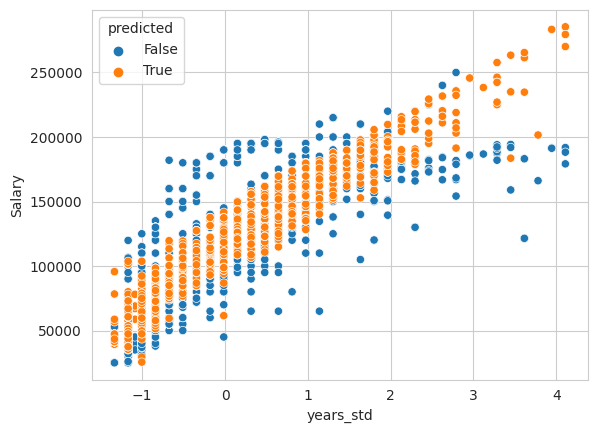

In [ ]:
with sns.axes_style('whitegrid'):

  sns.scatterplot(data=prediction, x='years_std', y='Salary', hue='predicted')